# Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique to reduce the dimensions of a large data set by transforming the large set of variables into a smaller one that contains most of the information in the large data set.

This is advantageous because smaller data sets are easier to explore and visualize, whch makes data analysis much easier and faster for machine learning algorithms.

If we use a PCA to transform a larger data set into a smaller data set, then PCA will:
- Tell us which variables are the most valuable for clustering the data
- Tell us how accurate the smaller data set is relative to the larger data set

### Example of PCA
<img src="images/pca/pca_1.png" height="75%" width="75%"></img>

Notice how there are 4 genes (4D), which means we cannot plot the data because visualizing 4D is impossible. Fortunately, we used PCA to resolve this issue by decreasing the dimensions.

PC1 and PC2 stand for principal component 1 and 2. The PCs are newly uncorrelated variables that compress most of the variance (information) of the data set. Since we don't know what PC1 and PC2 represent, we could guess what they are. For example, we can guess that PC1 is gender because gender causes large variances among genes in mice.

The correlated columns (mice) are clustered together on the PCA plot based on PC1 and PC2.
- Mice 1, 2, and 3 are clustered together
- Mice 4, 5, and 6 are clustered together

On the PCA graph above, PC1 = 91% and PC2 = 4%.
- PC1 (the largest variation) accounts for 91% of the variation in the data
- PC2 (the second largest variation) accounts for 4% of the variation in the data

Now we have a 2D data set using PC1 and PC2 with 95% of the variance from the large data set!

### PCA Axes Ranking
<img src="images/pca/pca_2.png" height="50%" width="50%"></img>

Even though the PC2 (y) distance of the blue cluster to the red cluster and the PC1 (x) distance of the yellow cluster to the red cluster are the same, the variance (difference) of the red cluster and the yellow cluster is greater than the variance (difference) of the red cluster and the blue cluster.

This is because PC1 has the largest variation percentage, so clusters separated on the PC1 axis would be more prone to being variant (different) than clusters separated on the PC2 axis.

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# import the data set
wine_df = pd.read_csv("datasets/wine.csv")

wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
# receive only the independent variables, disregard the dependent variable Customer_Segment
x = wine_df.iloc[:, 0:13].values

In [8]:
# import a Standarization Scaler for Feature Scaling
from sklearn.preprocessing import StandardScaler

# feature scale the (independent variables)
sc_X = StandardScaler()
scaled_x = sc_X.fit_transform(x)

# PCA Model

In [9]:
# import the PCA model
from sklearn.decomposition import PCA

In [10]:
# create a PCA with 2 principal components
pca = PCA(n_components=2)

# fit and transform the scaled independent variables
x_reduced = pca.fit_transform(scaled_x)

In [11]:
"""
the explained variance (PCs) of each principal component in descending order

PC1 equals 36.20% and PC2 equals 19.21% of the data set's variance, which is pretty good.
"""
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

# Graph PCA
Based on the graph of the PCA, there seems to be 3 clusters: the middle-left, middle-bottom, and top-right.

In [19]:
# re-create the DataFrame using the principal components
reduced_wine_df = pd.DataFrame(
    pca.components_,
    columns=wine_df.iloc[:, 0:13].columns,
    index=["PC1", "PC2"]
)

reduced_wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903


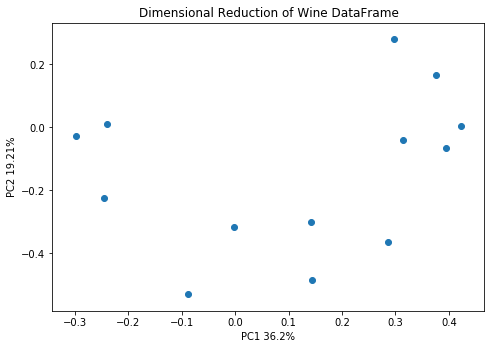

In [30]:
# create a blank plot figure
figure = plt.figure()

# add the graph's axes with their aspect ratios
axes = figure.add_axes([1, 1, 1, 1])

# set the PC1 and PC2 labels on the axes
rounded_pc1 = str(round(pca.explained_variance_ratio_[0] * 100, 2))
rounded_pc2 = str(round(pca.explained_variance_ratio_[1] * 100, 2))
axes.set_xlabel("PC1 " + rounded_pc1 + "%")
axes.set_ylabel("PC2 " + rounded_pc2 + "%")

# set the title
axes.set_title("Dimensional Reduction of Wine DataFrame")

# scatter plot the PC1 (x-axis) and PC2 (y-axis)
axes.scatter(x=reduced_wine_df.loc["PC1"], y=reduced_wine_df.loc["PC2"])